In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv('glassdoor_jobs.csv')
df = df.drop(['Job Description', 'Unnamed: 0'], axis=1)

In [3]:
df.head(3)

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1


## Checklist 

<input type="checkbox"> Distribuição categórica  
<input type="checkbox"> Distribuição numérica  
<input type="checkbox"> Remoção de dados inconsistentes  

<input type="checkbox"> Avaliar features mais de perto  
<input type="checkbox"> Engenharia de features   
<input type="checkbox"> OrdinalEncoder e OneHot  

<input type="checkbox"> Escalonamento  
<input type="checkbox"> GridSearch   
<input type="checkbox"> CrossValidation  

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          956 non-null    object 
 1   Salary Estimate    956 non-null    object 
 2   Rating             956 non-null    float64
 3   Company Name       956 non-null    object 
 4   Location           956 non-null    object 
 5   Headquarters       956 non-null    object 
 6   Size               956 non-null    object 
 7   Founded            956 non-null    int64  
 8   Type of ownership  956 non-null    object 
 9   Industry           956 non-null    object 
 10  Sector             956 non-null    object 
 11  Revenue            956 non-null    object 
 12  Competitors        956 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 97.2+ KB


In [5]:
df_cat = df.select_dtypes(include=['object'])
df_num = df.select_dtypes(include=['float64', 'int64'])

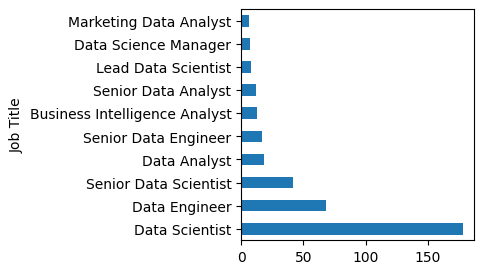

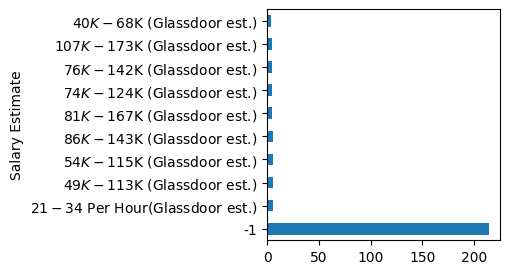

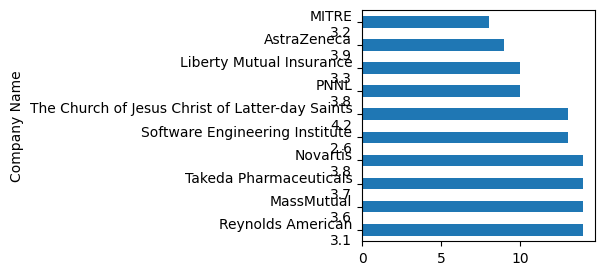

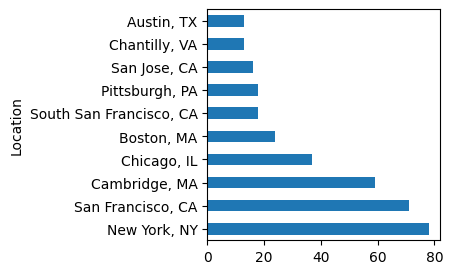

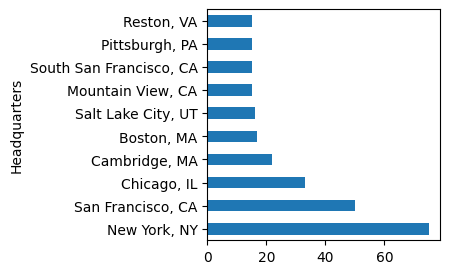

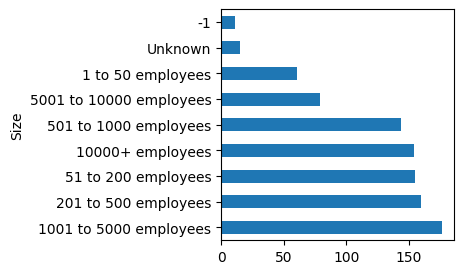

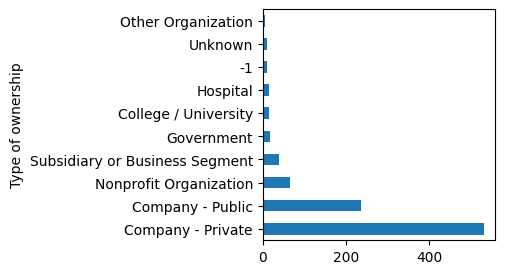

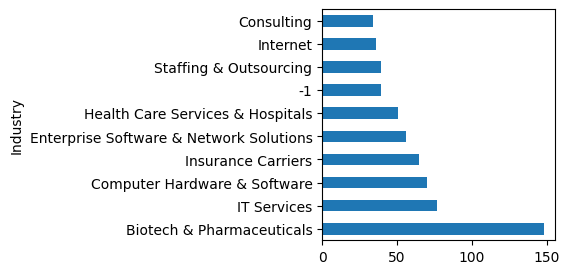

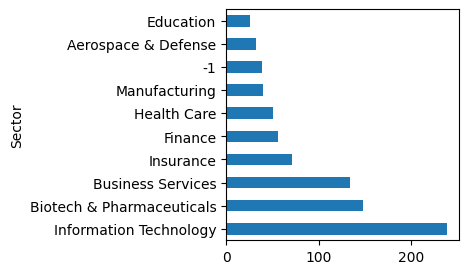

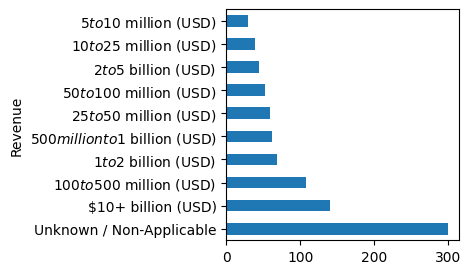

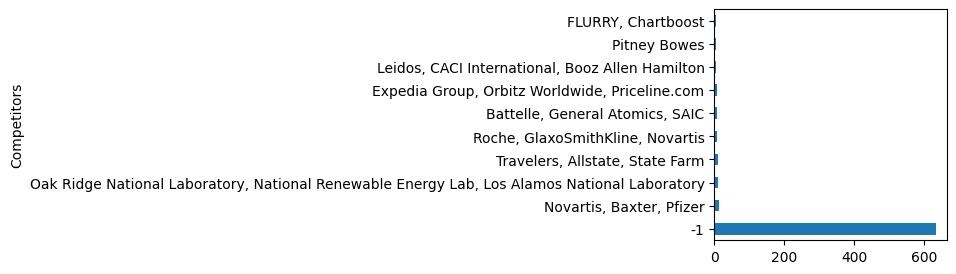

In [6]:
for col in df_cat:
    top_cat = df_cat[col].value_counts()
    if top_cat.iloc[0] > 1:  # Todas as categorias são diferentes
        top_cat.head(10).plot(kind='barh', figsize=(3, 3))
        plt.show()

In [7]:
for col in df_cat:
    df = df[~df[col].isin(['Unknown', 'Unknown / Non-Applicable', '-1'])]

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Founded'}>]], dtype=object)

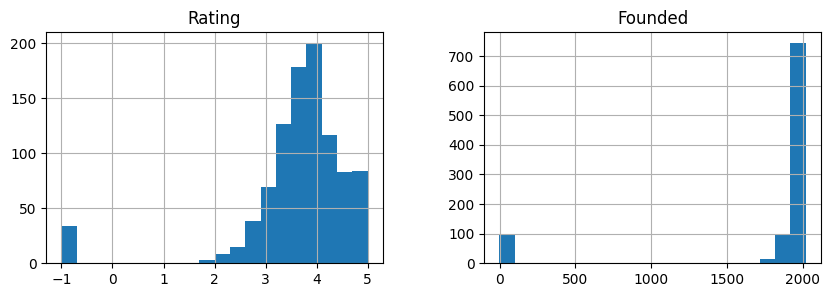

In [8]:
df_num.hist(bins=20, figsize=(10, 3))

In [9]:
df = df[df['Rating'] != -1]
df = df[df['Founded'] > 1500]

In [10]:
df.shape

(230, 13)

## Engenharia 

In [11]:
df.reset_index(inplace=True)
df.head()

,index,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,3,Data Scientist,$56K-$97K (Glassdoor est.),3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
1,5,Data Scientist,$71K-$119K (Glassdoor est.),3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,Real Estate,Real Estate,$1 to $2 billion (USD),"Digital Realty, CoreSite, Equinix"
2,9,Data Scientist,$120K-$160K (Glassdoor est.),4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,Internet,Information Technology,$100 to $500 million (USD),"Clicktripz, SmarterTravel"
3,12,Staff Data Scientist - Technology,$106K-$172K (Glassdoor est.),3.2,Walmart\n3.2,"Plano, TX","Bentonville, AR",10000+ employees,1962,Company - Public,"Department, Clothing, & Shoe Stores",Retail,$10+ billion (USD),"Target, Costco Wholesale, Amazon"
4,14,Data Scientist,$83K-$144K (Glassdoor est.),3.7,Takeda Pharmaceuticals\n3.7,"Cambridge, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Novartis, Baxter, Pfizer"


In [12]:
range_salary = df['Salary Estimate'].str.extract(r'\$(\d+)K?-\$(\d+)K?').astype(float)
df['avg_salary'] = range_salary[0] + range_salary[1] / 2


In [13]:
location_split = df['Location'].str.split(',')
df['city'] = location_split.str[0]
df['state'] = location_split.str[1]

In [14]:
df['competitors']  = df['Competitors'].str.split(',').apply(len)

In [15]:
df['is_senior'] = df['Job Title'].str.lower().str.contains(r'\b(sr|senior)\b', regex=True)
df['is_senior'] = df['is_senior'].astype(int)

C:\Users\Windows11\AppData\Local\Temp\ipykernel_4368\3700267804.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_senior'] = df['Job Title'].str.lower().str.contains(r'\b(sr|senior)\b', regex=True)


In [16]:
df['Job Title'].unique()

array(['Data Scientist', 'Staff Data Scientist - Technology',
       'Scientist I/II, Biology', 'Data Analyst', 'Scientist',
       'Senior Data Scientist', 'Lead Data Scientist',
       'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'Data Scientist SR',
       'Sr. Scientist II', 'Data Engineer', 'Senior Data Engineer',
       'Senior Machine Learning (ML) Engineer / Data Scientist - Cyber Security Analytics',
       'Associate Scientist', 'Scientist 2, QC Viral Vector',
       'Data Scientist/ML Engineer', 'Data Scientist - Bioinformatics',
       'Senior Data Scientist Statistics',
       'Pricipal Scientist Molecular and cellular biologist',
       'Staff Data Scientist', 'Senior Scientist - Neuroscience',
       'Senior Data Analyst',
       'Sr. Scientist - Digital & Image An

In [17]:
def simplify_job_title(title):
    title = str(title).lower()
    if 'data scientist' in title or 'data science' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'Machine Learning Engineer'
    elif 'scientist' in title:
        return 'Scientist'
    elif 'software engineer' in title or 'product engineer' in title:
        return 'Software Engineer'
    elif 'director' in title or 'manager' in title or 'vp' in title:
        return 'Director / Manager'
    else:
        return 'Specialty / Other'


df['job_category'] = df['Job Title'].apply(simplify_job_title)

In [18]:
df['job_category'].value_counts()

job_category
Data Scientist               102
Data Engineer                 42
Scientist                     37
Data Analyst                  37
Specialty / Other              7
Machine Learning Engineer      5
Name: count, dtype: int64

In [19]:
df.drop(['Job Title', 'Salary Estimate', 'Location', 'Competitors', 'index',
         'Headquarters', 'Company Name'], axis=1, inplace=True)

In [20]:
df['Size'].unique()

array(['1001 to 5000 employees', '201 to 500 employees',
       '51 to 200 employees', '10000+ employees', '501 to 1000 employees',
       '5001 to 10000 employees', '1 to 50 employees'], dtype=object)

In [21]:
joquinha = {'Rating': 4.5,
            'Size': '201 to 500 employees',
            'Founded':1992,
            'Type of ownership': 'Company - Private',
            'Industry': 'Colleges & Universities', 
            'Sector': 'Education',
            'Revenue': '$1 to $5 million (USD)',
            'city': 'Dallas',
            'state': 'TX', 
            'competitors': 4,
            'is_senior': 0,
            'job_category': 'Data Scientist',
            'avg_salary': 0
            }
df = pd.concat([df, pd.DataFrame([joquinha])], ignore_index=True)

In [22]:
oe_revenue = OrdinalEncoder(handle_unknown='error', categories=[
    ['1 to 50 employees', '51 to 200 employees', '201 to 500 employees', 
    '501 to 1000 employees', '1001 to 5000 employees', '5001 to 10000 employees',
    '10000+ employees',]
])
df['Size'] = oe_revenue.fit_transform(df[['Size']])

In [23]:
oe_revenue = OrdinalEncoder(handle_unknown='error', categories=[
    ['$1 to $5 million (USD)', '$5 to $10 million (USD)', '$10 to $25 million (USD)', 
    '$25 to $50 million (USD)', '$50 to $100 million (USD)', '$100 to $500 million (USD)',
    '$500 million to $1 billion (USD)', '$1 to $2 billion (USD)', '$2 to $5 billion (USD)',
    '$5 to $10 billion (USD)', '$10+ billion (USD)',]
])
df['Revenue'] = oe_revenue.fit_transform(df[['Revenue']])

In [24]:
df_obj = df.select_dtypes(include=['object'])
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

for col in df_obj:
    transformed = ohe.fit_transform(df[[col]])
    df = pd.concat([df, transformed], axis=1).drop(columns=[col])

In [25]:
joquinha = df.iloc[[-1]]
df = df.drop(df.index[-1])

In [26]:
corr = df.corr()['avg_salary']
corr.sort_values(ascending=False)

avg_salary                                  1.000000
city_Mountain View                          0.331191
state_ CA                                   0.306048
Industry_Internet                           0.257824
city_Chicago                                0.236582
                                              ...   
state_ NE                                  -0.178832
city_Omaha                                 -0.178832
Type of ownership_Nonprofit Organization   -0.235717
job_category_Data Analyst                  -0.354493
state_TX                                         NaN
Name: avg_salary, Length: 167, dtype: float64

In [27]:
X = df.drop(['avg_salary'], axis=1)
y = df['avg_salary']

In [28]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

## Colocando pra funcionar

In [29]:
X = df.drop(['avg_salary'], axis=1)
y = df['avg_salary']

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
cv = KFold(shuffle=True, random_state=71)

param_grid = {
    'n_estimators': [50, 60],               # número de árvores
    'max_depth': [20, 30, 40],              # profundidade máxima
    'min_samples_split': [2, 5, 10],        # mínimo p/ dividir nó
    'min_samples_leaf': [1, 2, 4],          # mínimo p/ ser folha
    'max_features': ['sqrt', 'log2', None]  # nº de features p/ split
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='r2',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid = grid_search.fit(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


![cross_validation](cv.png)

In [31]:
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor R²:", grid_search.best_score_)

Melhores parâmetros: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Melhor R²: 0.7106138669021899


In [32]:
p = grid_search.best_params_

rf = RandomForestRegressor(
    n_estimators=p['n_estimators'],
    max_depth=p['max_depth'], 
    min_samples_leaf=p['min_samples_leaf'],
    min_samples_split=p['min_samples_split'],
    max_features=p['max_features'],
    random_state=71
)

rf.fit(X, y)

RandomForestRegressor(max_depth=40, max_features='sqrt', n_estimators=50,
                      random_state=71)

In [33]:
joquinha.drop(['avg_salary'], axis=1, inplace=True)

In [34]:
rf.predict(joquinha)

array([143.14333333])